In [1]:
import pandas as pd
import numpy as np

In [2]:
raw = pd.read_csv('Winter_EV_Profiles.csv', header=None)
print(raw.shape)
raw.sample()

(288, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
219,3,0,0,0,3,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0


In [3]:
index = pd.timedelta_range(start='00:00:00', freq='5min', end='23:55:00')
index[:5]

TimedeltaIndex(['00:00:00', '00:05:00', '00:10:00', '00:15:00', '00:20:00'], dtype='timedelta64[ns]', freq='5T')

In [4]:
len(raw) == len(index)

True

In [5]:
raw.index = index
raw.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
00:00:00,0,0,3,0,0,3,3,0,3,3,...,0,3,0,0,3,3,3,3,3,0
00:05:00,0,0,3,0,0,3,3,0,3,3,...,0,3,0,0,3,3,3,3,3,0
00:10:00,0,0,3,0,0,3,3,0,3,3,...,0,3,0,0,3,3,3,3,3,0
00:15:00,0,0,3,0,0,3,3,0,3,3,...,0,0,0,0,3,3,3,3,3,0
00:20:00,0,0,3,0,0,3,3,0,3,3,...,0,0,0,0,3,3,3,3,3,0


In [6]:
ev_load = raw.sum(axis=1) / len(raw.columns)

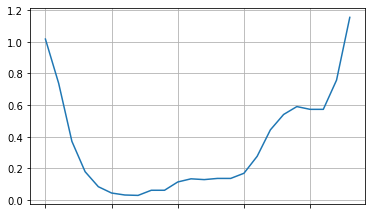

In [7]:
ev_load = ev_load.resample('1H').mean()
ax = ev_load.plot(grid=True, rot=45, x_compat=True)

In [8]:
ev_load.shape

(24,)

In [9]:
day = ev_load.reset_index(drop=True)
year = np.tile(day, 7*52)

In [10]:
output = pd.DataFrame(year, columns=['domestic'])
output

,domestic
0,1.0175
1,0.7375
2,0.3700
3,0.1775
4,0.0825
...,...
8731,0.5900
8732,0.5725
8733,0.5725
8734,0.7575


In [11]:
output.to_csv('../cleaned/low_voltage_network_solutions_profiles.csv')

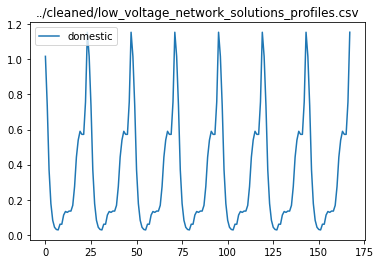

In [12]:
output[:24*7].plot(
    title='../cleaned/low_voltage_network_solutions_profiles.csv')